In [1]:
import torch
import random
import numpy as np
import os
from torch import nn
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

corpus_file = '../hw2.1_corpus.txt'

In [2]:
# Load Corpus

corpus = []
with open(corpus_file,'r') as f:
    for row in f:
        row = row.replace('\n','')
        row = [w for w in row]
        corpus.append(row)

In [3]:
# Use list to guarantee the embedded index for each word are same everytime

words = []
words_set = set()
for ws in corpus:
    for w in ws:
        if w not in words_set:
            words_set.add(w)
            words.append(w)

In [4]:
import re

class Embedding:

    def __init__(self,words=None,dim=300):
        self.word_dict = {}
        self.word_list = []
        self.emb_dim = dim
        self.maxPOS = 12      # Maximum POS
        self.addition_words = ['<PAD>','<SOS>','<EOS>','<UNK>']
        
        for POS in range(self.maxPOS):
            self.addition_words.append(str(POS))
        
        for addition_word in self.addition_words:
            if addition_word not in words:
                self.word_dict[addition_word] = len(self.word_list)
                self.word_list.append(addition_word)
        
        for word in words:
            if word not in self.word_dict:
                self.word_dict[word] = len(self.word_list)
                self.word_list.append(word)
                
        self.vectors = torch.nn.init.uniform_(
                torch.empty(len(self.word_dict),dim))
        
    def to_index(self, word):
        # single word tokenize
        if word not in self.word_dict:
            return self.word_dict['<UNK>']
        
        return self.word_dict[word]
        
    def tokenize(self, words):
        # whole sentence tokenize
        return [self.to_index(w) for w in words]
    
    def to_word(self, idx):
        
        return self.word_list[idx]
        
    def unTokenize(self,ids):
        
        return [self.to_word(idx) for idx in ids]
        
    def get_vocabulary_size(self):
        return self.vectors.shape[0]
    
    def get_dim(self):
        return self.vectors.shape[1]

In [5]:
# establish embedder to tokenize
embedder = Embedding(words=words,dim=300)

PAD = embedder.to_index('<PAD>')
SOS = embedder.to_index('<SOS>')
EOS = embedder.to_index('<EOS>')

In [6]:
all_set = []
counting_table = np.zeros((embedder.maxPOS+1,embedder.maxPOS+1))

for former,latter in zip(corpus[:-1],corpus[1:]):
    
    n = len(latter)
    
    addition_tokens = []
    
    former = ['<SOS>'] + former + ['<EOS>'] 
    latter = ['<SOS>'] + latter + ['<EOS>']
    
    selected_idx = random.randint(a=1,b=min(n,embedder.maxPOS))
    
    while 1:
        a = random.randint(a=0,b=selected_idx)
        b = selected_idx - a
        
        if (a,b) not in [(4,2),(2,4)]:
            break
        
    counting_table[a,b] += 1
    
    addition_tokens.append(latter[selected_idx])
    if a > 0:    
        addition_tokens.append(str(a))
    if b > 0:
        addition_tokens.append(str(b))
    
    former = former + addition_tokens
    
    all_set.append((former,latter))
    
print(counting_table)

[[    0. 52971. 33890. 24296. 18252. 13834. 14338.  7428.  4888.  3441.
   2116.  1444.   877.]
 [53270. 33971. 24081. 18376. 13674. 14319.  7365.  5062.  3338.  2217.
   1369.   912.     0.]
 [34011. 24246. 17998. 13776.     0.  7377.  5021.  3331.  2277.  1391.
    902.     0.     0.]
 [23960. 18197. 13812. 14414.  7352.  4997.  3418.  2230.  1436.   897.
      0.     0.     0.]
 [18495. 13889.     0.  7454.  5096.  3420.  2203.  1409.   943.     0.
      0.     0.     0.]
 [13563. 14249.  7289.  5150.  3444.  2304.  1429.   925.     0.     0.
      0.     0.     0.]
 [14364.  7455.  4968.  3274.  2227.  1348.   915.     0.     0.     0.
      0.     0.     0.]
 [ 7328.  5144.  3395.  2309.  1327.   936.     0.     0.     0.     0.
      0.     0.     0.]
 [ 5070.  3422.  2191.  1391.   908.     0.     0.     0.     0.     0.
      0.     0.     0.]
 [ 3333.  2216.  1421.   911.     0.     0.     0.     0.     0.     0.
      0.     0.     0.]
 [ 2200.  1406.   949.     0.     0.    

In [7]:
from sklearn.model_selection import train_test_split

train_set,valid_set = train_test_split(all_set,test_size=0.2,random_state=42)

print(len(all_set),len(train_set),len(valid_set))

741714 593371 148343


In [8]:
# list of turple : [(x0,y0),(x1,y1),(x2,y2),....]
all_set[0:5]

[(['<SOS>',
   '心',
   '疼',
   '你',
   '还',
   '没',
   '挣',
   '脱',
   '思',
   '念',
   '的',
   '囚',
   '禁',
   '<EOS>',
   '段',
   '4',
   '1'],
  ['<SOS>',
   '他',
   '在',
   '你',
   '一',
   '段',
   '难',
   '忘',
   '远',
   '行',
   '最',
   '后',
   '却',
   '离',
   '去',
   '<EOS>']),
 (['<SOS>',
   '他',
   '在',
   '你',
   '一',
   '段',
   '难',
   '忘',
   '远',
   '行',
   '最',
   '后',
   '却',
   '离',
   '去',
   '<EOS>',
   '我',
   '6',
   '1'],
  ['<SOS>', '你', '无', '力', '依', '靠', '在', '我', '这', '里', '<EOS>']),
 (['<SOS>',
   '你',
   '无',
   '力',
   '依',
   '靠',
   '在',
   '我',
   '这',
   '里',
   '<EOS>',
   '的',
   '7',
   '1'],
  ['<SOS>', '隔', '着', '刚', '被', '雨', '淋', '湿', '的', '玻', '璃', '<EOS>']),
 (['<SOS>',
   '隔',
   '着',
   '刚',
   '被',
   '雨',
   '淋',
   '湿',
   '的',
   '玻',
   '璃',
   '<EOS>',
   '哪',
   '9'],
  ['<SOS>', '你', '问', '了', '我', '到', '底', '爱', '在', '哪', '里', '<EOS>']),
 (['<SOS>',
   '你',
   '问',
   '了',
   '我',
   '到',
   '底',
   '爱',
   '在',
   '哪',
   '里',
   '<EOS

In [9]:
class SentDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        
        return self.data[index]
        
    def collate_fn(self, datas):
        # get max length in this batch
        max_data_len = max([len(data[0]) for data in datas])
        max_label_len = max([len(data[1]) for data in datas])
        
        batch_x = []
        batch_y = []
        len_x = []
        len_y = []
        batch_y_ = []
        
        
        for data,label in datas:
            
            len_x.append(len(data))
            len_y.append(len(label))
            
            # Tokenize
            pad_data = embedder.tokenize(data)
            pad_label = embedder.tokenize(label)
            
            # Padding data and label
            if len(data) < max_data_len:
                pad_data.extend([PAD] * (max_data_len-len(data)))
            if len(label) < max_label_len:
                pad_label.extend([PAD] * (max_label_len-len(label)))
                
                
            batch_x.append(pad_data)
            batch_y.append(pad_label)
            
            # generate y_
            focus_designate = [PAD] * len(pad_label)
            focus_designate[0] = SOS
            focus_designate[pad_label.index(EOS)] = EOS
            
            
            idx1 = data[data.index('<EOS>')+2]
            
            
            if data.index('<EOS>')+3 < len(data):
                idx2 = data[data.index('<EOS>')+3]
                idx = int(idx1) + int(idx2)
            else:
                idx = int(idx1)
            focus_designate[idx] = pad_label[idx]
            
            batch_y_.append(focus_designate)
            
            
        return torch.LongTensor(batch_x), torch.LongTensor(len_x), torch.LongTensor(batch_y), len_y, torch.LongTensor(batch_y_)

In [10]:
# For Validate~~~~

dataset = SentDataset(train_set)
dataloader = DataLoader(dataset=dataset,
                        batch_size=4,
                        shuffle=True,
                        collate_fn=dataset.collate_fn,
                        num_workers=0)
for x,x_len,y,y_len,y_ in dataloader:
    print('Sentence lenght:',x_len,y_len,'\n')
    
    for xi,yi,y_i in zip(x,y,y_):      
        
        print(embedder.unTokenize(xi))
        print(embedder.unTokenize(yi))
        print(embedder.unTokenize(y_i),'\n')
    
    break


Sentence lenght: tensor([12, 12, 11, 10]) [4, 10, 11, 5] 

['<SOS>', '入', '目', '心', '神', '为', '之', '一', '爽', '<EOS>', '这', '1']
['<SOS>', '这', '些', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['<SOS>', '这', '<PAD>', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>'] 

['<SOS>', '想', '你', '的', '时', '候', '我', '不', '哭', '<EOS>', '只', '1']
['<SOS>', '只', '为', '心', '中', '有', '一', '棵', '树', '<EOS>', '<PAD>']
['<SOS>', '只', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<EOS>', '<PAD>'] 

['<SOS>', '看', '看', '你', '己', '猜', '透', '<EOS>', '接', '2', '6', '<PAD>']
['<SOS>', '憑', '著', '直', '覺', '將', '心', '聲', '接', '收', '<EOS>']
['<SOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '接', '<PAD>', '<EOS>'] 

['<SOS>', '跟', '着', '我', '一', '起', '<EOS>', '要', '2', '1', '<PAD>', '<PAD>']
['<SOS>', '要', '不', '要', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['<SOS>', '<PAD>', '<PAD>', '要', '<EOS>', '<PAD

In [11]:
from torch.nn.utils.rnn import  pack_padded_sequence, pad_packed_sequence

class Encoder(nn.Module):

    def __init__(self, vocab_size, embedding_size, output_size):
        
        super(Encoder, self).__init__()

        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size,embedder.get_dim())
        self.embedding.weight = nn.Parameter(embedder.vectors)
        self.gru = nn.GRU(embedding_size, output_size,batch_first=True, bias=False)

    def forward(self, input_seqs, input_lengths, hidden=None):
        
        # Sort mini-batch by input_lengths
        sorted_input_lengths, indices = torch.sort(input_lengths,descending=True)
        _, desorted_indices = torch.sort(indices, descending=False)
        input_seqs = input_seqs[indices]
        
        # Encoder work
        embedded = self.embedding(input_seqs)
        packed = pack_padded_sequence(embedded, sorted_input_lengths.cpu().numpy(), batch_first=True)
        packed_outputs, hidden = self.gru(packed, hidden)
        outputs, output_lengths = pad_packed_sequence(packed_outputs,batch_first=True)
        
        # Desort mini-batch
        outputs = outputs[desorted_indices]
        hidden = hidden[:,desorted_indices]
        
        return outputs, hidden

In [12]:
class Decoder(nn.Module):

    def __init__(self, hidden_size, output_size, teacher_forcing_ratio=0.5):
        super(Decoder, self).__init__()

        self.hidden_size = hidden_size
        self.output_size = output_size
        self.embedding = nn.Embedding(embedder.get_vocabulary_size(),embedder.get_dim()) # Unused
        self.embedding.weight = nn.Parameter(embedder.vectors)
        self.cell = nn.GRUCell(embedder.get_dim(), hidden_size, bias=False)
        self.clf = nn.Linear(hidden_size, output_size, bias=False)
        
        if hidden_size == embedder.vectors.T.shape[0]:
            self.clf.weight = nn.Parameter(embedder.vectors)

        self.log_softmax = nn.LogSoftmax(dim=1)  # work with NLLLoss

        self.teacher_forcing_ratio = teacher_forcing_ratio

    def forward_step(self, inputs, hidden):
        
        # Unused
        embedded = self.embedding(inputs)
        # For research : all x to 0
        embedded = torch.zeros_like(embedded)
        
        hidden = self.cell(embedded, hidden) # [B,Hidden_dim]
        clf_output = self.clf(hidden) # [B,Output_dim]
        output = self.log_softmax(clf_output)

        return output, hidden

    def forward(self, context_vector, target_vars, target_lengths):

        batch_size = context_vector.shape[1]
        
        decoder_input = torch.LongTensor([SOS] * batch_size).to(device)
        decoder_hidden = context_vector.squeeze(0)

        if target_lengths is None:
            max_target_length = 50
        else:
            max_target_length = max(target_lengths)
        decoder_outputs = []
        decoder_hiddens = []

        use_teacher_forcing = True if random.random() < self.teacher_forcing_ratio else False
        
        for t in range(max_target_length):    
            
            decoder_outputs_on_t, decoder_hidden = self.forward_step(decoder_input, decoder_hidden)
            decoder_outputs.append(decoder_outputs_on_t)
            decoder_hiddens.append(decoder_hidden)
            
            # Take input for next GRU iteration
            if use_teacher_forcing :
                decoder_input = target_vars[:,t]
            else:
                decoder_input = decoder_outputs_on_t.argmax(-1)
            
            # Early Stop when all predict <EOS> 
            if torch.all(decoder_input==EOS) and target_lengths is None and self.train() == False:
                break
            
        # Stack output of each word at dimension 2
        decoder_outputs = torch.stack(decoder_outputs,dim=2)
        # Stack hidden of each timestep at dimension 1
        decoder_hiddens = torch.stack(decoder_hiddens,dim=1)
        
        return decoder_outputs, decoder_hiddens

In [13]:
class Seq2Seq(nn.Module):
    def __init__(self,encoder,decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, input_seqs, input_lengths, target_seqs=None, target_lengths=None):
        outputs, hidden = encoder(input_seqs, input_lengths)
        outputs, hiddens = decoder(hidden, target_seqs, target_lengths)
        return outputs,hiddens

In [14]:
from torch.utils.data import DataLoader
from tqdm import tqdm_notebook as tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

context_dim = 128

encoder = Encoder(embedder.get_vocabulary_size(),embedder.get_dim(),output_size=context_dim)
decoder = Decoder(context_dim,embedder.get_vocabulary_size(),0.5)
model = Seq2Seq(encoder,decoder)
model.to(device)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(6575, 300)
    (gru): GRU(300, 128, bias=False, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(6575, 300)
    (cell): GRUCell(300, 128, bias=False)
    (clf): Linear(in_features=128, out_features=6575, bias=False)
    (log_softmax): LogSoftmax()
  )
)

# Training

In [15]:
'''def run_epoch(epoch,dataset,isTraining):
    
    if isTraining:
        model.train()
    else:
        model.eval()
        
    dataloader = DataLoader(dataset=dataset,
                            batch_size=32,
                            shuffle=True,
                            collate_fn=dataset.collate_fn,
                            num_workers=0)
    
    if isTraining:
        desc='Train {}'
    else:
        desc='Valid {}'
    
    trange = tqdm(enumerate(dataloader), total=len(dataloader),desc=desc.format(epoch))
    
    loss=0
    acc = 0
    
    for i,(x,x_len,y,y_len,y_) in trange:
        
        x = x.to(device)
        y = y.to(device)
        y_ = y_.to(device)
        
        # outputs : [b,emb,s] , hiddens : [b,s,hidden]
        outputs,hiddens = model(x,x_len,y,y_len)
        
        idx = y_>2
        tf_map = y_[idx] == outputs.argmax(1)[idx]
        batch_acc = tf_map.sum().cpu().float().numpy()/len(tf_map)
        acc += batch_acc
        
        batch_loss_all = criterion(outputs, y)
        batch_loss_designated = criterion(outputs, y_)
        batch_loss = (1-focus_ratio)*batch_loss_all + focus_ratio*batch_loss_designated
        
        if isTraining:
            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()
        
        loss += batch_loss.item()
        
        trange.set_postfix({'loss':loss/(i+1),'accuracy':acc/(i+1)})
        
        if isTraining:
            history_loss['train'].append(batch_loss.item())
            history_acc['train'].append(batch_acc)
        else:
            history_loss['valid'].append(batch_loss.item())
            history_acc['valid'].append(batch_acc)'''

"def run_epoch(epoch,dataset,isTraining):\n    \n    if isTraining:\n        model.train()\n    else:\n        model.eval()\n        \n    dataloader = DataLoader(dataset=dataset,\n                            batch_size=32,\n                            shuffle=True,\n                            collate_fn=dataset.collate_fn,\n                            num_workers=0)\n    \n    if isTraining:\n        desc='Train {}'\n    else:\n        desc='Valid {}'\n    \n    trange = tqdm(enumerate(dataloader), total=len(dataloader),desc=desc.format(epoch))\n    \n    loss=0\n    acc = 0\n    \n    for i,(x,x_len,y,y_len,y_) in trange:\n        \n        x = x.to(device)\n        y = y.to(device)\n        y_ = y_.to(device)\n        \n        # outputs : [b,emb,s] , hiddens : [b,s,hidden]\n        outputs,hiddens = model(x,x_len,y,y_len)\n        \n        idx = y_>2\n        tf_map = y_[idx] == outputs.argmax(1)[idx]\n        batch_acc = tf_map.sum().cpu().float().numpy()/len(tf_map)\n        ac

In [16]:
'''# Training


dataset_all = SentDataset(all_set)
dataset_train = SentDataset(train_set)
dataset_valid = SentDataset(valid_set)

criterion = torch.nn.NLLLoss(ignore_index=PAD, size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
max_epoch = 20
focus_ratio = 0.5

history_loss = {'train':[],'valid':[]}
history_acc = {'train':[],'valid':[]}


for epoch in range(max_epoch):
    
    # Training
    run_epoch(epoch,dataset=dataset_train,isTraining=True)
    
    # Validation
    run_epoch(epoch,dataset=dataset_valid,isTraining=False)
    
    # Saving
    if not os.path.exists('model'):
        os.makedirs('model')
    torch.save(model.state_dict(), 'model/model.pkl.{}'.format(epoch))'''

"# Training\n\n\ndataset_all = SentDataset(all_set)\ndataset_train = SentDataset(train_set)\ndataset_valid = SentDataset(valid_set)\n\ncriterion = torch.nn.NLLLoss(ignore_index=PAD, size_average=True)\noptimizer = torch.optim.Adam(model.parameters(), lr=1e-3)\nmax_epoch = 20\nfocus_ratio = 0.5\n\nhistory_loss = {'train':[],'valid':[]}\nhistory_acc = {'train':[],'valid':[]}\n\n\nfor epoch in range(max_epoch):\n    \n    # Training\n    run_epoch(epoch,dataset=dataset_train,isTraining=True)\n    \n    # Validation\n    run_epoch(epoch,dataset=dataset_valid,isTraining=False)\n    \n    # Saving\n    if not os.path.exists('model'):\n        os.makedirs('model')\n    torch.save(model.state_dict(), 'model/model.pkl.{}'.format(epoch))"

# Plot (Loss and acc)

In [17]:
'''import matplotlib.pyplot as plt

modes = ['train', 'valid']
recs = [history_loss, history_acc]
names = ['Loss', 'Accuracy']

values = []
for mode in modes:
    v = []
    for rec in recs:
        v.append(rec[mode])
    values.append(v)
 
plt.figure(figsize=(32, 4))
plt.subplots_adjust(left=0.02, right=0.999)
for r, name in enumerate(names):
    plt.subplot(1, len(recs), r+1)
    for m in range(len(modes)):
        plt.plot(values[m][r])
    plt.title(name)
    plt.legend(modes)
    plt.xlabel('iteration')
    plt.show()
#plt.savefig('figure.png', dpi=100)'''

"import matplotlib.pyplot as plt\n\nmodes = ['train', 'valid']\nrecs = [history_loss, history_acc]\nnames = ['Loss', 'Accuracy']\n\nvalues = []\nfor mode in modes:\n    v = []\n    for rec in recs:\n        v.append(rec[mode])\n    values.append(v)\n \nplt.figure(figsize=(32, 4))\nplt.subplots_adjust(left=0.02, right=0.999)\nfor r, name in enumerate(names):\n    plt.subplot(1, len(recs), r+1)\n    for m in range(len(modes)):\n        plt.plot(values[m][r])\n    plt.title(name)\n    plt.legend(modes)\n    plt.xlabel('iteration')\n    plt.show()\n#plt.savefig('figure.png', dpi=100)"

# Inference Test Data
### Define test data dataloader

In [18]:
class TestDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]
        
    def collate_fn(self, datas):
        max_data_len = max([len(data) for data in datas])
        batch_x = []
        len_x = []
        
        for data in datas:
            len_x.append(len(data))
            pad_data = [embedder.to_index(w) for w in data]
            if len(data) < max_data_len:
                pad_data.extend([PAD] * (max_data_len-len(data)))
            batch_x.append(pad_data)

        return torch.LongTensor(batch_x), torch.LongTensor(len_x)

## Load pre-trained model

In [19]:
path_pkl = '../pre-train/model.pkl.2-2-additional_without42&24'
model.load_state_dict(torch.load(path_pkl))
model.decoder.teacher_forcing_ratio = 0.0
model.eval()

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(6575, 300)
    (gru): GRU(300, 128, bias=False, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(6575, 300)
    (cell): GRUCell(300, 128, bias=False)
    (clf): Linear(in_features=128, out_features=6575, bias=False)
    (log_softmax): LogSoftmax()
  )
)

## 做一個指定位置的context hidden

In [20]:
context_spos = ['<SOS>', '让', '我', '拥', '有', '了', '恬', '静', '的', '<EOS>', '静','3','2']
len_context = torch.LongTensor([len(context_spos)])
context_spos = [embedder.to_index(w) for w in context_spos]
context_spos = torch.LongTensor([context_spos]).to(device)
context_spos = model.encoder(context_spos,len_context)[1] 
context_spos = context_spos.squeeze()# context hidden

In [21]:
context_spos.shape

torch.Size([128])

# Deconstruct

In [696]:
import torch.nn.functional as F

def Deconstruction(model,x,x_len):
    
    # Encoder 
    encoder_hiddens, context = model.encoder(x,x_len)
    context = context.squeeze(0)

    
    # get the transition state of ht_1 and ht 
    ht_1 = encoder_hiddens[:,-2,:]
    xt_1 = model.encoder.embedding(x[:,-1])
    U_h = F.linear(ht_1,encoder.gru.weight_hh_l0)
    W_x = F.linear(xt_1, encoder.gru.weight_ih_l0)
    Ur_h, Uz_h, Un_h = U_h.chunk(3, 1)
    Wr_x, Wz_x, Wn_x = W_x.chunk(3, 1)
    reset_gate_en = torch.sigmoid(Wr_x + Ur_h)
    update_gate_en = torch.sigmoid(Wz_x+Uz_h)
    new_gate_en = torch.tanh( Wn_x +reset_gate_en * Un_h)
    ht = new_gate_en + update_gate_en * (ht_1 - new_gate_en)
    ############## Use customized ht to replace context vector
    context = ht
    # replace cells in context hidden by context_spos
    cells = []
    for c in cells:
        context[:,c] = context_spos[c]
    
    # Decoder
    decoder_hidden = context.squeeze(0)
    
    # Collection signal
    decoder_outputs = []
    decoder_hiddens = []
    decoder_resetGates = []
    decoder_updateGates = []
    decoder_newGates = []
    
    while True:
        
        # GRU Cell
        gru = model.decoder.cell
        
        U_h = F.linear(decoder_hidden, gru.weight_hh)
        Ur_h, Uz_h, Un_h = U_h.chunk(3, 1)
        reset_gate = torch.sigmoid(Ur_h)
        update_gate = torch.sigmoid(Uz_h)
        new_gate = torch.tanh(reset_gate * Un_h)
        decoder_hidden = new_gate + update_gate * (decoder_hidden - new_gate)
        
        # Classifier
        clf_output = model.decoder.clf(decoder_hidden)
        decoder_output = model.decoder.log_softmax(clf_output)
        
        decoder_resetGates.append(reset_gate)
        decoder_updateGates.append(update_gate)
        decoder_newGates.append(new_gate)
        decoder_outputs.append(decoder_output)            
        decoder_hiddens.append(decoder_hidden)
                                                   
        if torch.all(decoder_output.argmax(-1)==EOS) == True:
            break
            
    outputs = torch.stack(decoder_outputs,dim=2)             # (b,6xxx,s)
    
    gru_info = { 
        'context':context,                                        # (b,128)
        'hiddens':torch.stack(decoder_hiddens,dim=2),             # (b,128,s)
        'resetgates':torch.stack(decoder_resetGates,dim=2),       # (b,128,s)
        'updategates':torch.stack(decoder_updateGates,dim=2),     # (b,128,s)
        'newgates':torch.stack(decoder_newGates,dim=2),           # (b,128,s)
        'precontext': ht_1, 
        'updategates_encoder': update_gate_en,
        'newgate_encoder': new_gate_en,
        'resetgate_encoder': reset_gate_en,
        'Wn_x':Wn_x,
        'Un_h': Un_h
    }
    
    return outputs, gru_info

## Generate certain condition valid datas ( by designated word / position filter )

In [23]:
# certain_set = []

# for sent in random.sample(corpus, k=16):
    
#     if len(sent) > 8:
#         sent = sent[:8]
#     else:
#         sent = sent + ['啊']*(8-len(sent))
    
#     designated_POS = random.randint(a=2,b=10)
#     designated_POS1 = random.randint(a=1,b=designated_POS-1)
#     designated_POS2 = designated_POS - designated_POS1
    
#     designated_word = random.choice(random.choice(corpus))
    
#     control_signal = [ designated_word, str(designated_POS1) , str(designated_POS2)]
    
#     control_signal = [ designated_word, '4','2']
    
#     data = ['<SOS>'] + sent + ['<EOS>'] + control_signal
    
#     print(data)
    
#     certain_set.append(data)
    
# dataset_certain = TestDataset(certain_set)

['<SOS>', '宁', '愿', '公', '开', '新', '爱', '侣', '得', '<EOS>', '瘪', '4', '2']
['<SOS>', '还', '有', '什', '么', '没', '说', '完', '的', '<EOS>', '一', '4', '2']
['<SOS>', '今', '夜', '不', '会', '再', '有', '难', '舍', '<EOS>', '那', '4', '2']
['<SOS>', '我', '的', '泪', '打', '在', '你', '额', '头', '<EOS>', '的', '4', '2']
['<SOS>', '太', '难', '过', '我', '还', '能', '浪', '费', '<EOS>', '歌', '4', '2']
['<SOS>', '角', '色', '出', '场', '啊', '啊', '啊', '啊', '<EOS>', '恨', '4', '2']
['<SOS>', '我', '又', '在', '山', '里', '转', '悠', '了', '<EOS>', '让', '4', '2']
['<SOS>', '以', '后', '自', '然', '会', '懂', '得', '啊', '<EOS>', '时', '4', '2']
['<SOS>', '她', '的', '脚', '印', '心', '中', '永', '印', '<EOS>', '的', '4', '2']
['<SOS>', '四', '野', '细', '雨', '春', '芒', '啊', '啊', '<EOS>', '到', '4', '2']
['<SOS>', '重', '复', '着', '熟', '悉', '的', '场', '景', '<EOS>', '己', '4', '2']
['<SOS>', '不', '能', '再', '和', '你', '相', '约', '啊', '<EOS>', '你', '4', '2']
['<SOS>', '自', '动', '聚', '在', '村', '口', '的', '大', '<EOS>', '你', '4', '2']
['<SOS>', '还', '把', '我', '辛', '苦', '养'

## Prediction certain condition data

In [24]:
# dataloader = DataLoader(dataset=dataset_certain,
#                         batch_size=128,
#                         shuffle=False,
#                         collate_fn=dataset_certain.collate_fn,
#                         num_workers=0)

# predictions = []
# trange = tqdm(dataloader, total=len(dataloader))

# for x,x_len in trange:
    
#     x = x.to(device)
    
#     outputs,gru_info = Deconstruction(model,x,x_len)
    
#     for pred in outputs.cpu().detach().numpy().argmax(1):
#         predictions.append(pred)

/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [25]:
# # Process multi-EOS tokens
# predictions_set = []
# for p in predictions:
#     p = list(p)
#     if EOS in p:
#         p = p[:p.index(EOS)+1]
#     else:
#         p.append(EOS)
#     predictions_set.append(embedder.unTokenize(p))
    

# for sent_id in range(len(certain_set)):
#     sent_in = ''.join(certain_set[sent_id])
#     sent_pred = ''.join(predictions_set[sent_id])
#     print('input:\t{}\npred:\t{}\n'.format(sent_in,sent_pred))

input:	<SOS>宁愿公开新爱侣得<EOS>瘪42
pred:	<SOS>我是的的的牌<EOS>

input:	<SOS>还有什么没说完的<EOS>一42
pred:	<SOS>我是的我我一个<EOS>

input:	<SOS>今夜不会再有难舍<EOS>那42
pred:	<SOS>你你你你在那么<EOS>

input:	<SOS>我的泪打在你额头<EOS>的42
pred:	<SOS>我是你你你的<EOS>

input:	<SOS>太难过我还能浪费<EOS>歌42
pred:	<SOS>我你你你的歌<EOS>

input:	<SOS>角色出场啊啊啊啊<EOS>恨42
pred:	<SOS>我是的的的恨<EOS>

input:	<SOS>我又在山里转悠了<EOS>让42
pred:	<SOS>我的的的你让我<EOS>

input:	<SOS>以后自然会懂得啊<EOS>时42
pred:	<SOS>我是的的的时<EOS>

input:	<SOS>她的脚印心中永印<EOS>的42
pred:	<SOS>我是的是我的<EOS>

input:	<SOS>四野细雨春芒啊啊<EOS>到42
pred:	<SOS>我我的我看到<EOS>

input:	<SOS>重复着熟悉的场景<EOS>己42
pred:	<SOS>我不我是自己<EOS>

input:	<SOS>不能再和你相约啊<EOS>你42
pred:	<SOS>我我你我在你<EOS>

input:	<SOS>自动聚在村口的大<EOS>你42
pred:	<SOS>我我的我着你<EOS>

input:	<SOS>还把我辛苦养大啊<EOS>之42
pred:	<SOS>我一我我的之后<EOS>

input:	<SOS>把所有的穷人都打<EOS>遗42
pred:	<SOS>我不的不不遗忘<EOS>

input:	<SOS>任发丝缠绕双眸啊<EOS>小42
pred:	<SOS>我是的的的小<EOS>



In [26]:
updategates = gru_info['updategates'].mean(0).detach().cpu().numpy()

resetgates = gru_info['resetgates'].mean(0).detach().cpu().numpy()

newgates = gru_info['newgates'].mean(0).detach().cpu().numpy()

context = gru_info['context'].detach().cpu().numpy()

output_len = updategates.shape[1]

updategates.shape , resetgates.shape , newgates.shape , context.shape


((128, 9), (128, 9), (128, 9), (16, 128))

## context_set[i] 收集position為i的輸入句經過Encoder產生的context(h0)

In [27]:
context_set = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

for xi,hi in zip(x,context):
    xi = xi.cpu().numpy()
    pos = 0
    for token in xi[::-1]:
        w = embedder.to_word(token)
        if w.isdigit():
            pos += int(w)
        else:
            break
    print(pos,w)
    context_set[pos].append(hi)
    
for i in range(1,len(context_set)):
    try:
        context_set[i] = np.stack(context_set[i],axis=0)
    except:
        print('pos',i,'is empty')
        pass

6 瘪
6 一
6 那
6 的
6 歌
6 恨
6 让
6 时
6 的
6 到
6 己
6 你
6 你
6 之
6 遗
6 小
pos 1 is empty
pos 2 is empty
pos 3 is empty
pos 4 is empty
pos 5 is empty
pos 7 is empty
pos 8 is empty
pos 9 is empty
pos 10 is empty
pos 11 is empty
pos 12 is empty


# >>>> Collect hidden context vectors with the same sum

In [42]:
from random import randint
def get2IntsWithSumN(n):
    num1 = randint(1, n - 1)
    num2 = n - num1
    return num1, num2

In [43]:
[get2IntsWithSumN(6) for i in range(20)]

[(5, 1),
 (2, 4),
 (4, 2),
 (2, 4),
 (1, 5),
 (4, 2),
 (5, 1),
 (1, 5),
 (1, 5),
 (3, 3),
 (4, 2),
 (3, 3),
 (1, 5),
 (4, 2),
 (5, 1),
 (5, 1),
 (1, 5),
 (3, 3),
 (1, 5),
 (1, 5)]

In [555]:
def get_certain_set(number_sum, designated_word=None, sample_size=16, show=False, the_first_num=None):
    certain_set = []

    for sent in random.sample(corpus, k=sample_size):
        
        if len(sent) > 8:
            sent = sent[:8]
        else:
            sent = sent + ['啊']*(8-len(sent))

#         designated_POS = random.randint(a=2,b=10)
#         designated_POS1 = random.randint(a=1,b=designated_POS-1)
#         designated_POS2 = designated_POS - designated_POS1
        if designated_word == None:
            designated_word = random.choice(random.choice(corpus))

#         control_signal = [ designated_word, str(designated_POS1) , str(designated_POS2)]
        if (the_first_num != None):
            num1, num2 = the_first_num, (number_sum - the_first_num) 
        else:
            num1, num2 = get2IntsWithSumN(number_sum)
        control_signal = [ designated_word, str(num1), str(num2)]

        data = ['<SOS>'] + sent + ['<EOS>'] + control_signal
        
        if show:
            print(data)

        certain_set.append(data)

    dataset_certain = TestDataset(certain_set)
    return dataset_certain

In [413]:
def predict(dataset, batch_size=16, verbose=True):
    dataloader = DataLoader(dataset=dataset,
                            batch_size=batch_size,
                            shuffle=False,
                            collate_fn=dataset.collate_fn,
                            num_workers=0)

    predictions = []
    if verbose:
        trange = tqdm(dataloader, total=len(dataloader))
    else:
        trange = dataloader

    for x,x_len in trange:

        x = x.to(device)

        outputs,gru_info = Deconstruction(model,x,x_len)

        for pred in outputs.cpu().detach().numpy().argmax(1):
            predictions.append(pred)
    return predictions, gru_info

In [81]:
def untokenize_output(dataset, predictions, verbose=True):
    # Process multi-EOS tokens
    predictions_set = []
    for p in predictions:
        p = list(p)
        if EOS in p:
            p = p[:p.index(EOS)+1]
        else:
            p.append(EOS)
        predictions_set.append(embedder.unTokenize(p))

    for sent_id in range(len(dataset)):
        sent_in = ''.join(dataset[sent_id])
        sent_pred = ''.join(predictions_set[sent_id])
        if verbose:
            print('input:\t{}\npred:\t{}\n'.format(sent_in,sent_pred))
    return dataset, predictions_set

In [72]:
def decodeContext(decoder_hidden):
    
    # Collection signal
    decoder_outputs = []
    decoder_hiddens = []
    decoder_resetGates = []
    decoder_updateGates = []
    decoder_newGates = []
    
    while True:
        
        # GRU Cell
        gru = model.decoder.cell
        
        U_h = F.linear(decoder_hidden, gru.weight_hh)
        Ur_h, Uz_h, Un_h = U_h.chunk(3, 1)
        reset_gate = torch.sigmoid(Ur_h)
        update_gate = torch.sigmoid(Uz_h)
        new_gate = torch.tanh(reset_gate * Un_h)
        decoder_hidden = new_gate + update_gate * (decoder_hidden - new_gate)
        
        # Classifier
        clf_output = model.decoder.clf(decoder_hidden)
        decoder_output = model.decoder.log_softmax(clf_output)
        
        decoder_resetGates.append(reset_gate)
        decoder_updateGates.append(update_gate)
        decoder_newGates.append(new_gate)
        decoder_outputs.append(decoder_output)            
        decoder_hiddens.append(decoder_hidden)
                                                   
        if torch.all(decoder_output.argmax(-1)==EOS) == True:
            break
            
    outputs = torch.stack(decoder_outputs,dim=2)             # (b,6xxx,s)
    return outputs

In [199]:
def swapHidden(number1=3, number2=6, swap_cells=[], print_sent=True, sample_size=1024):
    print(f"number1: {number1}, number2: {number2}, swap_cells={swap_cells}")
    ###########################################################################
    designated_word = random.choice(random.choice(corpus))
    # get dataset
    certain_set1 = get_certain_set(number1, designated_word=designated_word, sample_size=sample_size, show=print_sent)
    certain_set2 = get_certain_set(number2, designated_word=designated_word, sample_size=sample_size, show=print_sent)
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    prediction1_useless, gru_info1 = predict(certain_set1, batch_size=sample_size)
    prediction2_useless, gru_info2 = predict(certain_set2, batch_size=sample_size)
    context_vec1s = gru_info1['context'] # .detach().cpu().numpy()  # (bs, 128)
    context_vec2s = gru_info2['context'] # .detach().cpu().numpy()
    #Find the cells with (1)(not implemented) the lowest var for each context 
    #                    (2) the largest mean difference btw 2 contexts
    context1_mean = np.mean(context_vec1s.detach().cpu().numpy() , axis=0)
    context2_mean = np.mean(context_vec2s.detach().cpu().numpy() , axis=0)
    context1_var = np.var(context_vec1s.detach().cpu().numpy() , axis=0)
    context2_var = np.var(context_vec2s.detach().cpu().numpy() , axis=0)
    diff = np.absolute(context1_mean - context2_mean)
    yy = sorted(zip(range(128), diff), key=lambda x: -x[1]) # decreasing order
    yy = [y[0] for y in yy]
    print('>>> The cells with max diff of mean: ', yy)
    ###########################################################################
    isSuccesSwap = True
    success_rate1 = 0
    success_rate2 = 0
    # Load hidden states
#     certain_set1 = get_certain_set(swap_position, number1, batch_size=sample_size)
#     certain_set2 = get_certain_set(swap_position, number2, batch_size=sample_size)
#     predictions1_useless, gru_info1 = predict(certain_set1, disabled_cells=[],
#                                               batch_size=sample_size, disabled_clf_input_cells=[])
#     predictions2_useless, gru_info2 = predict(certain_set2, disabled_cells=[], 
#                                               batch_size=sample_size, disabled_clf_input_cells=[])

#     context_vec1s = gru_info1['hiddens'].permute(2, 0, 1) # [sent_len, bs, 128]
#     context_vec2s = gru_info2['hiddens'].permute(2, 0, 1)
#         print(context_vec1s.shape)
    # Swap some cell values in the hidden state!!!
    context_vec1_tmp = context_vec1s.clone()  # (bs, 128)
    context_vec2_tmp = context_vec2s.clone()
    mask = torch.ones(128, dtype=torch.bool).cuda()
    for cell in swap_cells:
        mask[cell] = 0
    mask_inv = ~mask
    context_vec1s = context_vec2_tmp * mask_inv + context_vec1s * mask  
    context_vec2s = context_vec1_tmp * mask_inv + context_vec2s * mask 
    outputs1 = decodeContext(context_vec1s) # [12, 6575, 6]
    outputs2 = decodeContext(context_vec2s)
    predictions1 = []
    predictions2 = []
    for pred in outputs1.cpu().detach().numpy().argmax(1):
                predictions1.append(pred)
    for pred in outputs2.cpu().detach().numpy().argmax(1):
        predictions2.append(pred)

    def calculateSuccessRate(input_set, prediction_set, target_pos):
        correct_count = 0
        for sent_in, sent_pred in zip(input_set, prediction_set):
            target_word = sent_in[-3]
#             print(f"{target_word}, {sent_pred}, {sent_in}, {target_pos}")
            if target_pos < len(sent_pred):
#                 print(sent_pred[target_pos], target_word)
                if sent_pred[target_pos] == target_word:
                    correct_count += 1

        success_rate = correct_count / len(prediction_set)
        return success_rate
#     print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
#     _, _ = untokenize_output(certain_set1, prediction1_useless, verbose=print_sent)
#     print('WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW')
#     _, _ = untokenize_output(certain_set2, prediction2_useless, verbose=print_sent) 
#     print('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA')
    input_set, prediction_set = untokenize_output(certain_set1, predictions1, verbose=print_sent) 
    success_rate1 = calculateSuccessRate(input_set, prediction_set, number2)
    input_set, prediction_set = untokenize_output(certain_set2, predictions2, verbose=print_sent)
    success_rate2 = calculateSuccessRate(input_set, prediction_set, number1)
    if success_rate1 < 1 or success_rate2 < 1:
        isSuccesSwap = False
        
    print(f">>> Success rate: {np.mean(success_rate1)}, and {np.mean(success_rate2)}, {number1}, {number2}")
 
    return isSuccesSwap

# Swap sum 3 and sum 6

In [197]:
swap_cells = [12, 60, 111, 31, 49, 47, 63, 29, 59, 13, 36, 121, 108, 24, 
              103, 10, 102, 48, 73, 98, 83, 74, 33, 112, 118, 84, 95, 
              18, 6, 51, 37, 28, 61, 1, 67, 22, 45, 9, 86, 21]
swap_cells = [12, 60, 111, 31, 49, 47, 63, 29, 59, 13, 36, 121, 108, 24, 
              103, 10, 102, 48, 73, 98, 83, 74, 33, 112, 118, 84, 95]
swap_cells = [12, 60, 111, 31, 49, 47, 63, 29, 59, 13, 36, 121, 108, 24]
swap_cells = [12, 60, 111, 31, 49, 47, 63, 29, 59, 13, 36]

In [198]:
swapHidden(swap_cells=swap_cells, print_sent=False)

number1: 3, number2: 6, swap_cells=[12, 60, 111, 31, 49, 47, 63, 29, 59, 13, 36]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [12, 60, 111, 31, 49, 13, 47, 29, 63, 59, 36, 24, 102, 121, 124, 33, 112, 51, 95, 118, 18, 10, 74, 6, 108, 55, 22, 73, 1, 61, 103, 67, 98, 48, 99, 37, 45, 89, 8, 107, 86, 72, 127, 17, 123, 84, 28, 27, 94, 70, 56, 82, 3, 50, 88, 126, 71, 21, 46, 54, 87, 9, 93, 92, 83, 85, 41, 43, 77, 96, 120, 105, 62, 79, 39, 97, 7, 116, 26, 53, 14, 101, 57, 68, 69, 40, 109, 25, 119, 2, 4, 0, 16, 20, 113, 104, 64, 11, 75, 66, 44, 115, 100, 65, 81, 114, 5, 15, 19, 23, 30, 32, 34, 35, 38, 42, 52, 58, 76, 78, 80, 90, 91, 106, 110, 117, 122, 125]
>>> Success rate: 1.0, and 1.0, 3, 6


True

# Swap sum 3 and sum 5

In [202]:
swap_cells = [12, 111, 60, 31, 49, 47, 13, 98, 50, 59, 51]

In [203]:
swapHidden(number1=3, number2=5, swap_cells=swap_cells, print_sent=False)

number1: 3, number2: 5, swap_cells=[12, 111, 60, 31, 49, 47, 13, 98, 50, 59, 51]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [12, 60, 31, 111, 49, 13, 47, 98, 59, 24, 33, 103, 51, 83, 118, 55, 112, 74, 37, 45, 39, 121, 63, 108, 95, 21, 6, 86, 18, 61, 107, 99, 67, 71, 28, 27, 9, 22, 50, 89, 10, 127, 88, 1, 87, 124, 54, 43, 29, 36, 7, 70, 84, 46, 126, 72, 41, 8, 3, 105, 62, 68, 92, 97, 48, 94, 102, 17, 77, 120, 85, 2, 25, 53, 26, 14, 116, 123, 57, 93, 56, 76, 40, 96, 69, 16, 100, 79, 109, 20, 113, 101, 0, 4, 44, 82, 75, 104, 115, 5, 11, 15, 19, 23, 30, 32, 34, 35, 38, 42, 52, 58, 64, 65, 66, 73, 78, 80, 81, 90, 91, 106, 110, 114, 117, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 3, 5


True

# Swap sum 3 and sum 4

In [236]:
swap_cells = [12, 111, 31, 60, 47, 49, 13, 59, 24]

In [237]:
swapHidden(number1=3, number2=5, swap_cells=swap_cells, print_sent=False)

number1: 3, number2: 5, swap_cells=[12, 111, 31, 60, 47, 49, 13, 59, 24]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [12, 111, 31, 60, 47, 49, 13, 63, 59, 98, 118, 24, 33, 45, 121, 107, 108, 86, 10, 103, 1, 43, 28, 50, 74, 99, 84, 95, 124, 67, 127, 27, 71, 37, 112, 21, 61, 62, 8, 79, 88, 39, 29, 87, 53, 36, 54, 3, 96, 18, 126, 89, 92, 55, 56, 6, 51, 102, 83, 9, 48, 41, 105, 22, 25, 97, 85, 94, 26, 17, 123, 70, 113, 116, 77, 68, 93, 69, 57, 46, 72, 82, 16, 40, 100, 120, 0, 14, 2, 4, 109, 7, 20, 101, 44, 73, 64, 75, 115, 117, 5, 11, 15, 19, 23, 30, 32, 34, 35, 38, 42, 52, 58, 65, 66, 76, 78, 80, 81, 90, 91, 104, 106, 110, 114, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 3, 5


True

# Swap sum 4 and sum 5

In [248]:
swap_cells = [60, 12, 49, 31, 111, 63, 98, 13, 47, 102, 59]

In [249]:
swapHidden(number1=4, number2=5, swap_cells=swap_cells, print_sent=False)

number1: 4, number2: 5, swap_cells=[60, 12, 49, 31, 111, 63, 98, 13, 47, 102, 59]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [60, 12, 49, 111, 31, 79, 47, 50, 13, 59, 24, 95, 112, 102, 45, 98, 124, 83, 51, 121, 37, 33, 63, 86, 55, 39, 28, 67, 103, 89, 127, 18, 6, 61, 74, 10, 21, 96, 1, 27, 99, 84, 56, 71, 7, 62, 88, 70, 17, 126, 108, 107, 53, 29, 41, 68, 105, 36, 48, 92, 123, 118, 3, 9, 97, 87, 46, 93, 22, 69, 101, 54, 26, 85, 8, 72, 82, 120, 76, 25, 77, 113, 20, 57, 100, 40, 43, 0, 14, 109, 4, 94, 2, 75, 116, 16, 44, 42, 64, 104, 114, 115, 5, 11, 15, 19, 23, 30, 32, 34, 35, 38, 52, 58, 65, 66, 73, 78, 80, 81, 90, 91, 106, 110, 117, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 4, 5


True

# Swap sum 4 and sum 6

In [265]:
swap_cells = [60, 49, 12, 111, 29, 31, 47, 13, 63, 36, 59]

In [266]:
swapHidden(number1=4, number2=6, swap_cells=swap_cells, print_sent=False)

number1: 4, number2: 6, swap_cells=[60, 49, 12, 111, 29, 31, 47, 13, 63, 36, 59]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [60, 49, 12, 63, 111, 29, 31, 79, 47, 13, 36, 59, 24, 121, 103, 98, 74, 118, 112, 33, 86, 124, 67, 108, 10, 48, 6, 45, 99, 83, 39, 37, 51, 62, 3, 102, 27, 50, 127, 55, 107, 82, 21, 71, 9, 61, 88, 7, 92, 126, 84, 22, 53, 18, 89, 28, 54, 8, 73, 77, 70, 105, 1, 97, 26, 41, 25, 72, 43, 40, 93, 116, 87, 14, 17, 101, 56, 120, 68, 94, 85, 69, 57, 95, 96, 109, 4, 100, 16, 113, 0, 20, 123, 2, 104, 75, 44, 46, 64, 115, 5, 11, 15, 19, 23, 30, 32, 34, 35, 38, 42, 52, 58, 65, 66, 76, 78, 80, 81, 90, 91, 106, 110, 114, 117, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 4, 6


True

# Swap sum 5 and sum 6

In [279]:
swap_cells = [60, 29, 63, 49, 111, 36, 98, 59, 47, 13, 24]

In [280]:
swapHidden(number1=5, number2=6, swap_cells=swap_cells, print_sent=False)

number1: 5, number2: 6, swap_cells=[60, 29, 63, 49, 111, 36, 98, 59, 47, 13, 24]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [60, 63, 29, 49, 36, 59, 98, 111, 47, 13, 121, 2, 67, 10, 37, 48, 22, 86, 74, 108, 45, 51, 61, 112, 107, 103, 55, 99, 124, 33, 71, 39, 1, 3, 118, 28, 102, 89, 127, 41, 73, 95, 126, 24, 7, 94, 92, 84, 6, 9, 27, 72, 18, 8, 83, 17, 26, 21, 85, 56, 46, 69, 68, 77, 54, 93, 88, 53, 87, 116, 14, 12, 96, 105, 25, 70, 40, 101, 82, 100, 4, 62, 16, 97, 120, 104, 43, 57, 109, 50, 0, 123, 113, 44, 75, 20, 64, 79, 19, 31, 115, 119, 5, 11, 15, 23, 30, 32, 34, 35, 38, 42, 52, 58, 65, 66, 76, 78, 80, 81, 90, 91, 106, 110, 114, 117, 122, 125]
>>> Success rate: 1.0, and 1.0, 5, 6


True

# Swap sum 2 and sum 3

In [289]:
swap_cells = [104, 62, 43, 47, 13, 95, 50, 59, 79, 1]

In [290]:
swapHidden(number1=2, number2=3, swap_cells=swap_cells, print_sent=False)

number1: 2, number2: 3, swap_cells=[104, 62, 43, 47, 13, 95, 50, 59, 79, 1]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [47, 13, 104, 43, 62, 50, 95, 79, 59, 102, 1, 124, 24, 12, 45, 107, 108, 99, 39, 51, 112, 74, 83, 37, 55, 118, 22, 127, 103, 18, 98, 121, 28, 67, 61, 70, 21, 56, 7, 71, 89, 9, 20, 6, 84, 41, 86, 8, 53, 10, 72, 46, 85, 93, 69, 82, 92, 94, 68, 126, 26, 33, 105, 123, 17, 63, 31, 25, 101, 87, 16, 96, 54, 120, 77, 48, 2, 109, 57, 36, 100, 4, 113, 49, 0, 75, 44, 29, 27, 3, 114, 5, 11, 14, 15, 19, 23, 30, 32, 34, 35, 38, 40, 42, 52, 58, 60, 64, 65, 66, 73, 76, 78, 80, 81, 88, 90, 91, 97, 106, 110, 111, 115, 116, 117, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 2, 3


True

# Swap sum 2 and sum 4

In [299]:
swap_cells = [47, 12, 104, 62, 43, 95, 50, 111, 13, 31, 59]

In [300]:
swapHidden(number1=2, number2=4, swap_cells=swap_cells, print_sent=False)

number1: 2, number2: 4, swap_cells=[47, 12, 104, 62, 43, 95, 50, 111, 13, 31, 59]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [12, 47, 104, 62, 43, 95, 50, 31, 111, 13, 59, 79, 63, 107, 83, 118, 1, 103, 45, 112, 102, 121, 99, 6, 2, 10, 33, 51, 39, 84, 37, 89, 21, 108, 61, 74, 71, 124, 87, 86, 126, 70, 98, 82, 18, 8, 36, 67, 28, 53, 54, 41, 96, 92, 46, 93, 7, 17, 26, 9, 22, 69, 56, 116, 127, 120, 105, 25, 14, 72, 68, 55, 77, 85, 57, 24, 16, 123, 20, 94, 27, 88, 100, 48, 101, 4, 113, 109, 29, 97, 3, 44, 75, 0, 49, 114, 5, 11, 15, 19, 23, 30, 32, 34, 35, 38, 40, 42, 52, 58, 60, 64, 65, 66, 73, 76, 78, 80, 81, 90, 91, 106, 110, 115, 117, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 2, 4


True

# Swap sum 2 and sum 5

In [325]:
swap_cells = [12, 47, 60, 111, 31, 104, 62, 43, 59, 13, 95, 49, 98, 50, 63 ]

In [326]:
swapHidden(number1=2, number2=5, swap_cells=swap_cells, print_sent=False)

number1: 2, number2: 5, swap_cells=[12, 47, 60, 111, 31, 104, 62, 43, 59, 13, 95, 49, 98, 50, 63]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [12, 47, 111, 104, 62, 31, 43, 95, 60, 50, 59, 13, 49, 98, 63, 24, 1, 118, 33, 107, 102, 45, 99, 83, 112, 61, 121, 10, 55, 6, 103, 51, 96, 127, 22, 74, 37, 27, 28, 67, 86, 39, 79, 89, 88, 71, 2, 87, 7, 36, 72, 124, 94, 41, 108, 92, 29, 84, 82, 54, 8, 26, 69, 17, 70, 3, 97, 93, 21, 76, 25, 68, 53, 126, 77, 116, 46, 120, 18, 57, 101, 56, 85, 105, 40, 0, 9, 48, 100, 20, 109, 16, 113, 4, 44, 14, 75, 115, 5, 11, 15, 19, 23, 30, 32, 34, 35, 38, 42, 52, 58, 64, 65, 66, 73, 78, 80, 81, 90, 91, 106, 110, 114, 117, 119, 122, 123, 125]
>>> Success rate: 0.99609375, and 0.9970703125, 2, 5


False

# Swap sum 2 and sum 6

In [339]:
swap_cells = [12, 60, 47, 111, 31, 62, 104, 43, 50, 49, 59, 29, 13, 63, 24, 36]

In [340]:
swapHidden(number1=2, number2=6, swap_cells=swap_cells, print_sent=False)

number1: 2, number2: 6, swap_cells=[12, 60, 47, 111, 31, 62, 104, 43, 50, 49, 59, 29, 13, 63, 24, 36]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



>>> The cells with max diff of mean:  [12, 47, 60, 111, 31, 104, 62, 43, 95, 50, 49, 59, 29, 13, 63, 79, 24, 98, 36, 103, 124, 118, 121, 102, 45, 33, 1, 99, 107, 39, 51, 83, 74, 67, 37, 86, 127, 28, 112, 10, 17, 70, 6, 27, 55, 21, 108, 22, 89, 88, 3, 92, 87, 113, 48, 61, 84, 94, 8, 72, 26, 7, 71, 53, 9, 68, 126, 54, 73, 75, 25, 18, 105, 116, 77, 97, 96, 82, 14, 46, 56, 93, 40, 57, 41, 120, 2, 85, 69, 123, 101, 16, 100, 4, 20, 0, 44, 64, 109, 11, 114, 115, 5, 15, 19, 23, 30, 32, 34, 35, 38, 42, 52, 58, 65, 66, 76, 78, 80, 81, 90, 91, 106, 110, 117, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 2, 6


True

In [346]:
from utils import Union

In [350]:
swap_cells_collection = []
swap_cells_collection.append(set([104, 62, 43, 47, 13, 95, 50, 59, 79, 1]))
swap_cells_collection.append(set([47, 12, 104, 62, 43, 95, 50, 111, 13, 31, 59]))
swap_cells_collection.append(set([12, 47, 60, 111, 31, 104, 62, 43, 59, 13, 95, 49, 98, 50, 63 ]))
swap_cells_collection.append(set([12, 60, 47, 111, 31, 62, 104, 43, 50, 49, 59, 29, 13, 63, 24, 36]))

swap_cells_collection.append(set([12, 111, 31, 60, 47, 49, 13, 59, 24]))
swap_cells_collection.append(set([12, 111, 60, 31, 49, 47, 13, 98, 50, 59, 51]))
swap_cells_collection.append(set([12, 60, 111, 31, 49, 47, 63, 29, 59, 13, 36]))



swap_cells_collection.append(set([60, 12, 49, 31, 111, 63, 98, 13, 47, 102, 59]))
swap_cells_collection.append(set([60, 49, 12, 111, 29, 31, 47, 13, 63, 36, 59]))

swap_cells_collection.append(set([60, 29, 63, 49, 111, 36, 98, 59, 47, 13, 24]))
cells = Union(swap_cells_collection)
print(cells)

[1, 12, 13, 24, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 98, 102, 104, 111]


# Test sum 2 and sum 6

In [487]:
swap_cells_final = [1, 12, 13, 24, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 98, 102, 104, 111]
# The cells below are from the observation of the plotted figure
swap_cells_final = [12, 13, 24, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]
swap_cells_final = [12, 13, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]

In [464]:
swapHidden(number1=4, number2=2, swap_cells=swap_cells_final, print_sent=False, sample_size=16)

number1: 4, number2: 2, swap_cells=[12, 13, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



>>> The cells with max diff of mean:  [47, 12, 104, 62, 43, 95, 59, 50, 111, 13, 31, 124, 112, 45, 83, 74, 102, 55, 108, 39, 103, 22, 127, 10, 33, 37, 6, 61, 107, 51, 84, 71, 118, 1, 86, 24, 99, 2, 98, 121, 79, 126, 7, 89, 67, 9, 56, 41, 53, 70, 8, 72, 113, 92, 46, 63, 26, 54, 68, 123, 87, 21, 25, 85, 105, 120, 82, 18, 77, 28, 96, 36, 93, 75, 94, 101, 17, 116, 14, 4, 20, 100, 27, 3, 88, 57, 69, 109, 49, 97, 60, 48, 29, 16, 44, 64, 117, 35, 110, 114, 42, 115, 0, 5, 11, 15, 19, 23, 30, 32, 34, 38, 40, 52, 58, 65, 66, 73, 76, 78, 80, 81, 90, 91, 106, 119, 122, 125]
>>> Success rate: 1.0, and 1.0, 4, 2


True

# given a+b = const-> 畫不同a, b正整數組合

In [465]:
def getContextMeanAndVar(designated_word=None, total_sum=6, the_first_num=2, 
                         plot_cells=[], print_sent=True, sample_size=1024, verbose=True):
    if verbose:
        print(f"total_sum: {total_sum}, plot_cells={plot_cells}")
    ###########################################################################
    if designated_word == None:
        designated_word = random.choice(random.choice(corpus))
    # get dataset
    certain_set1 = get_certain_set(total_sum, designated_word=designated_word,
                                   sample_size=sample_size, show=print_sent, 
                                   the_first_num=the_first_num)
    prediction1_useless, gru_info1 = predict(certain_set1, batch_size=sample_size, verbose=verbose)
    context_vec1s = gru_info1['context'] # .detach().cpu().numpy()  # (bs, 128)
    #Find the cells with (1)(not implemented) the lowest var for each context 
    #                    (2) the largest mean difference btw 2 contexts
    context1_mean = np.mean(context_vec1s.detach().cpu().numpy() , axis=0)
    context1_var = np.var(context_vec1s.detach().cpu().numpy() , axis=0)
    return context1_mean[plot_cells], context1_var[plot_cells]

In [466]:
import matplotlib.pyplot as plt

In [467]:
context_mean, context_var = getContextMeanAndVar(plot_cells=swap_cells_final)
context_mean2, context_var2 = getContextMeanAndVar(plot_cells=swap_cells_final, the_first_num=3)
# plt.bar(swap_cells_final, context_mean, width=0.1)
#     fig = plt.gcf()
#     fig.set_size_inches(18,10)

total_sum: 6, plot_cells=[12, 13, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]
['<SOS>', '它', '是', '我', '曾', '历', '经', '的', '风', '<EOS>', '不', '2', '4']
['<SOS>', '花', '在', '风', '中', '摇', '来', '摇', '去', '<EOS>', '不', '2', '4']
['<SOS>', '像', '遇', '见', '一', '本', '故', '事', '会', '<EOS>', '不', '2', '4']
['<SOS>', '电', '话', '一', '直', '都', '在', '枕', '边', '<EOS>', '不', '2', '4']
['<SOS>', '那', '是', '我', '心', '甘', '情', '愿', '承', '<EOS>', '不', '2', '4']
['<SOS>', '常', '回', '家', '看', '看', '回', '家', '看', '<EOS>', '不', '2', '4']
['<SOS>', '直', '催', '得', '人', '消', '瘦', '啊', '啊', '<EOS>', '不', '2', '4']
['<SOS>', '想', '要', '飞', '天', '那', '这', '呢', '黑', '<EOS>', '不', '2', '4']
['<SOS>', '人', '已', '老', '一', '柱', '香', '啊', '啊', '<EOS>', '不', '2', '4']
['<SOS>', '唱', '高', '十', '度', '在', '协', '助', '啊', '<EOS>', '不', '2', '4']
['<SOS>', '兰', '花', '指', '又', '一', '指', '衣', '带', '<EOS>', '不', '2', '4']
['<SOS>', '枉', '有', '千', '言', '万', '语', '讲', '啊', '<EOS>', '不', '2', '4']
['<SOS>', '爱

/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



total_sum: 6, plot_cells=[12, 13, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]
['<SOS>', '烟', '也', '有', '眷', '恋', '啊', '啊', '啊', '<EOS>', '去', '3', '3']
['<SOS>', '与', '其', '把', '爱', '变', '成', '了', '负', '<EOS>', '去', '3', '3']
['<SOS>', '两', '个', '人', '曾', '经', '相', '似', '的', '<EOS>', '去', '3', '3']
['<SOS>', '骑', '着', '单', '车', '笑', '啊', '啊', '啊', '<EOS>', '去', '3', '3']
['<SOS>', '当', '叶', '子', '离', '开', '了', '秋', '天', '<EOS>', '去', '3', '3']
['<SOS>', '春', '天', '和', '你', '漫', '步', '在', '盛', '<EOS>', '去', '3', '3']
['<SOS>', '她', '说', '美', '丽', '花', '儿', '好', '象', '<EOS>', '去', '3', '3']
['<SOS>', '是', '哪', '一', '颗', '星', '星', '掌', '管', '<EOS>', '去', '3', '3']
['<SOS>', '依', '然', '闪', '烁', '啊', '啊', '啊', '啊', '<EOS>', '去', '3', '3']
['<SOS>', '合', '幸', '福', '的', '预', '言', '陪', '你', '<EOS>', '去', '3', '3']
['<SOS>', '摇', '动', '着', '是', '胜', '利', '啊', '啊', '<EOS>', '去', '3', '3']
['<SOS>', '是', '该', '继', '续', '还', '是', '该', '放', '<EOS>', '去', '3', '3']
['<SOS>', '

In [532]:
def generateDataForTotalSumAndCertainWord(designated_word=None, total_sum=6, 
                                          swap_cells_final=swap_cells_final, verbose=True):
    random_word=False
    if designated_word == None:
        print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
        random_word = True
        designated_word = random.choice(random.choice(corpus))
    num_pairs = []
    means = []
    variances = []
    for the_first_num in range(1, total_sum):
        if random_word:
            designated_word = random.choice(random.choice(corpus))
            print(f">>> In generateDataForTotalSumAndCertainWord, random_word={designated_word}")
        num_pairs.append((the_first_num, total_sum - the_first_num))
        context_mean, context_var = getContextMeanAndVar(plot_cells=swap_cells_final, 
                                                         designated_word=designated_word, 
                                                         total_sum=total_sum, 
                                                         the_first_num=the_first_num, 
                                                         print_sent=False,
                                                         sample_size=1024,
                                                         verbose=verbose)
        means.append(context_mean)
        variances.append(context_var)
    return np.array(num_pairs), np.array(means), np.array(variances)

In [713]:
def plot(swap_cells, designated_word=None, total_sum=6):
    labels = swap_cells
    if designated_word == None:
        designated_word = random.choice(random.choice(corpus))
    num_pairs, means, variances = generateDataForTotalSumAndCertainWord(designated_word=designated_word, 
                                                                        total_sum=total_sum,
                                                                        verbose=False)

    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars

    fig, ax = plt.subplots(figsize=(12,5))
    for num_pair, mean in zip(num_pairs, means):
        rects1 = ax.bar(x, mean, width, label=f'{num_pair[0]} + {num_pair[1]}')
        x = x + 0.15
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('cell values')
    ax.set_title(f'sum = {total_sum}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

把


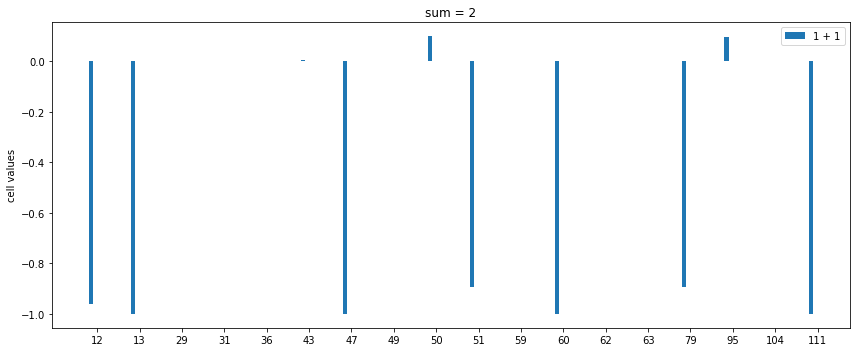

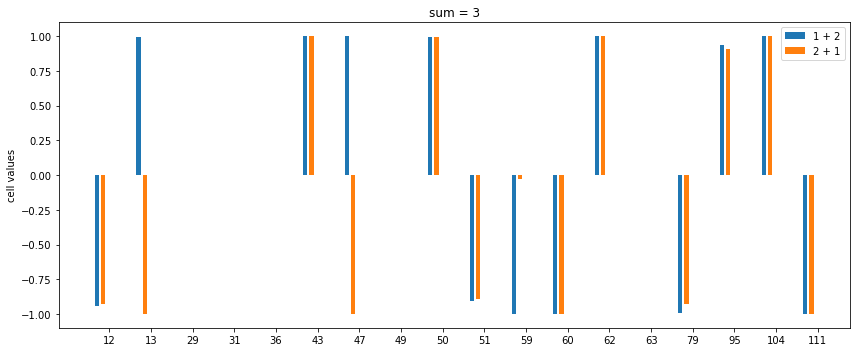

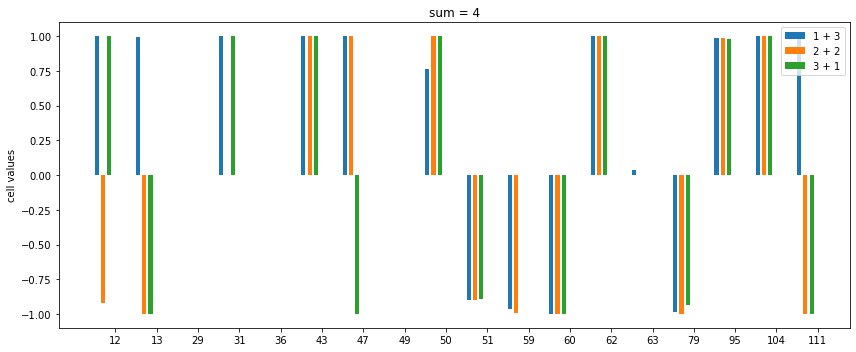

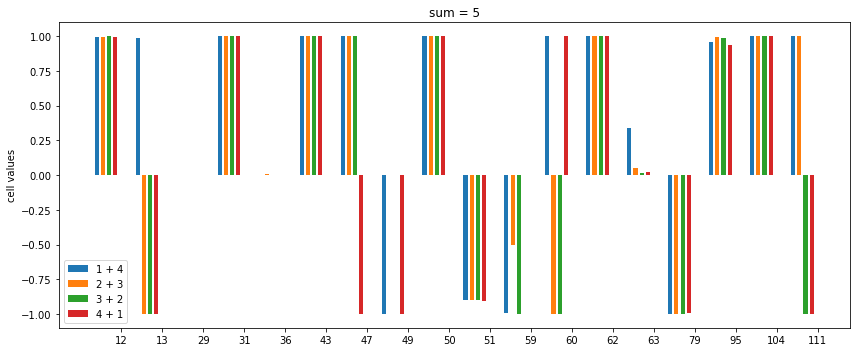

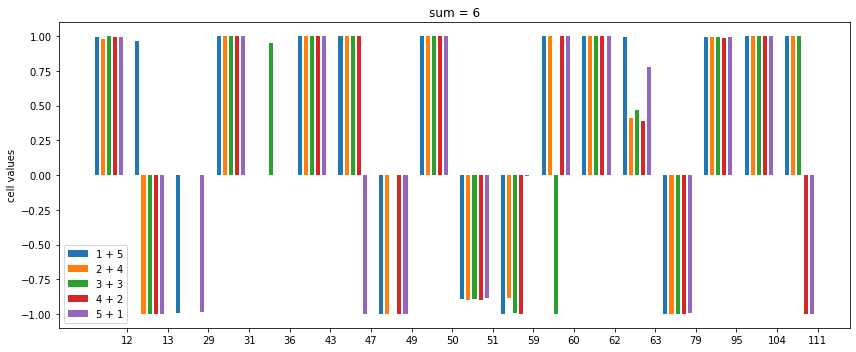

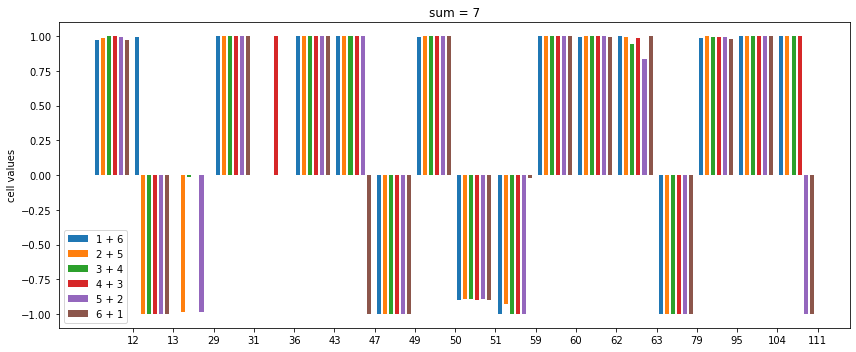

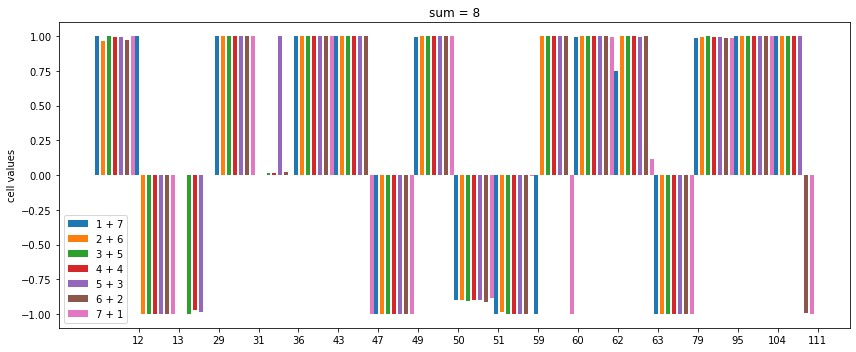

In [534]:
designated_word = random.choice(random.choice(corpus))
print(designated_word)
for total_sum in range(2, 9):
    plot(swap_cells=swap_cells_final, designated_word=designated_word, total_sum=total_sum)

# 操縱變因：加起來後定值=？

In [716]:
def plotByTotalSum(swap_cells, designated_word=None, total_sum_lower_bound=2, total_sum_upper_bound=3):
    labels = swap_cells
    if designated_word == None:
        designated_word = random.choice(random.choice(corpus))
    fig, ax = plt.subplots(figsize=(12,5))
    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars
    for total_sum in range(total_sum_lower_bound, total_sum_upper_bound + 1):
        _, means, variances = generateDataForTotalSumAndCertainWord(designated_word=designated_word,  
                                                                            total_sum=total_sum,
                                                                            verbose=False)
        means = np.mean(means , axis=0)
        variances = np.mean(variances , axis=0)


#     for num_pair, mean in zip(num_pairs, means):
        rects1 = ax.bar(x, means, width, label=f'{total_sum}')
        x = x + 0.15
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('cell values')
    ax.set_title(f'sum lower bound = {total_sum_lower_bound}, upper bound = {total_sum_upper_bound}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

想


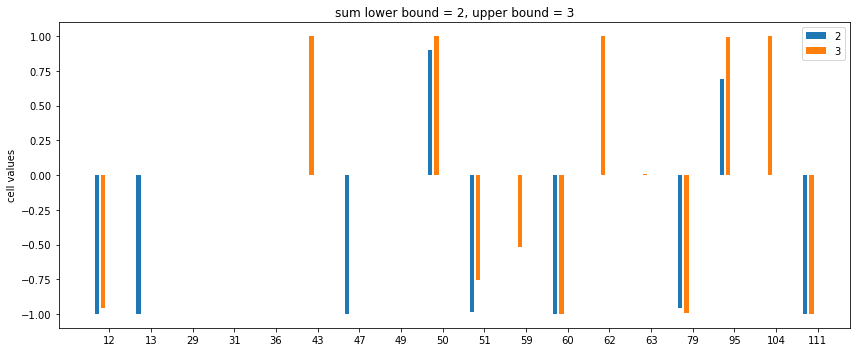

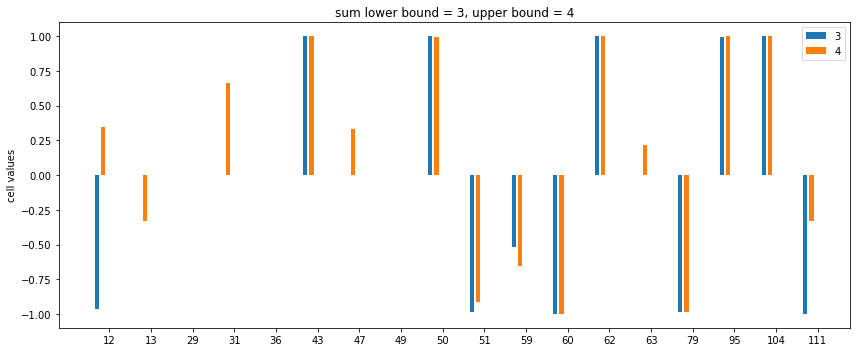

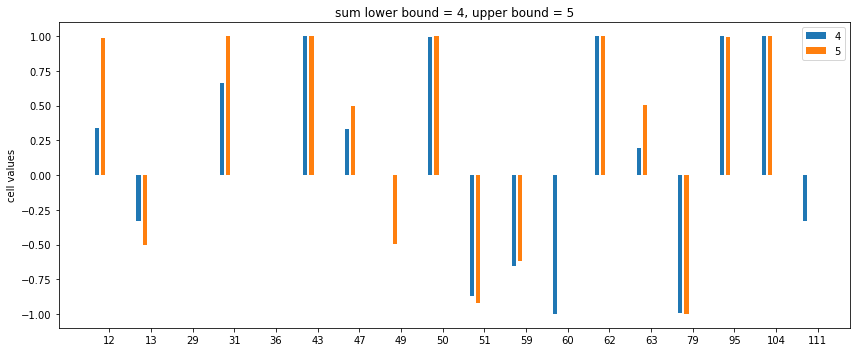

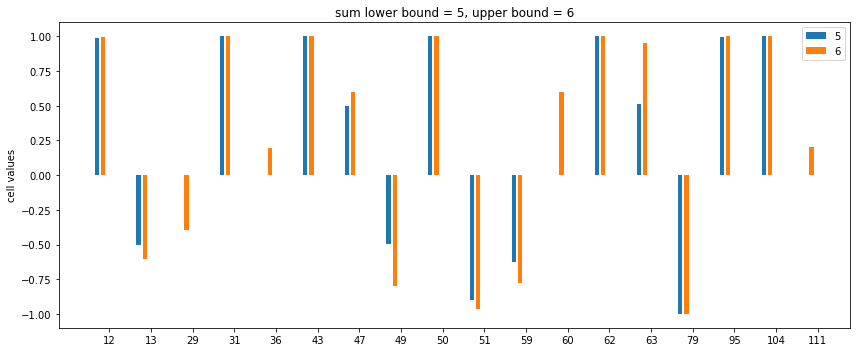

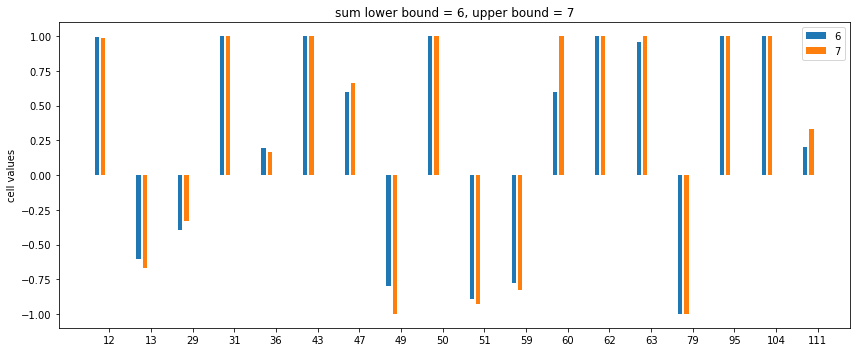

In [530]:
designated_word = random.choice(random.choice(corpus))
print(designated_word)
for i in range(2, 7):
    plotByTotalSum(swap_cells_final, designated_word=designated_word, total_sum_lower_bound=i, total_sum_upper_bound=(i + 1))


In [739]:
def plotGroup(data_group, labels, title="plot group example title", 
              x_title='cell id', y_title='cell values'):
    '''
    Input:
        data_group: of shape (n, x)
        labels: of shape (x,)
    Output:
        
    '''
    fig, ax = plt.subplots(figsize=(7,3))
    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars
    for i, (label, data) in enumerate(zip(labels, data_group)):
        rects1 = ax.bar(x, data, width, label=f'batch_no.{i}')
        x = x + 0.15
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

In [743]:
def getContext(designated_word=None, total_sum=6, the_first_num=2, 
               plot_cells=[], print_sent=True, sample_size=1024, 
               verbose=True, plot_gate_type='update_gate'):
    assert plot_gate_type in ['update_gate', 'new_gate']
    if verbose:
        print(f"total_sum: {total_sum}, plot_cells={plot_cells}")
    ###########################################################################
    if designated_word == None:
        designated_word = random.choice(random.choice(corpus))
    # get dataset
    certain_set1 = get_certain_set(total_sum, designated_word=designated_word,
                                   sample_size=sample_size, show=print_sent, 
                                   the_first_num=the_first_num)
    prediction1_useless, gru_info = predict(certain_set1, batch_size=sample_size, verbose=verbose)
    untokenize_output(certain_set1, prediction1_useless, verbose=print_sent) 
    context_vec1s = gru_info['context'] # .detach().cpu().numpy()  # (bs, 128)
    ht_1 = gru_info['precontext'].detach().cpu().numpy()
    updategate_en = gru_info['updategates_encoder'].detach().cpu().numpy()
    newgate_en = gru_info['newgate_encoder'].detach().cpu().numpy()
    resetgate_en = gru_info['resetgate_encoder'].detach().cpu().numpy()
    Wn_x = gru_info['Wn_x'].detach().cpu().numpy()
    Un_h = gru_info['Un_h'].detach().cpu().numpy()
#     print(context_vec1s.size(), ht_1.size(), updategate_en.size(), newgate_en.size())
    context = context_vec1s.detach().cpu().numpy()
    if verbose:
        if plot_gate_type == 'new_gate':
            gate = newgate_en
        elif plot_gate_type == 'update_gate':
            gate = updategate_en
#     plotGroup(gate, range(128),
#               title=f"all the 128 {plot_gate_type} for {the_first_num} + {total_sum - the_first_num}")
#     plotGroup(gate[:, plot_cells], plot_cells, 
#               title=f"all the 18 {plot_gate_type} for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(np.tanh(Wn_x[:, plot_cells] + resetgate_en[:, plot_cells] * Un_h[:, plot_cells]), plot_cells, 
              title=f"{len(plot_cells)} values of tanh (i.e. newgate)for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(newgate_en[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of newgate for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(updategate_en[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of update_gate for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(resetgate_en[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of reset_gate for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(Wn_x[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of Wn_x for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(Un_h[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of Un_h for {the_first_num} + {total_sum - the_first_num}")
    plotGroup((context - ht_1)[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of ht-ht_1 for {the_first_num} + {total_sum - the_first_num}")
    plotGroup(Wn_x[:, plot_cells] + resetgate_en[:, plot_cells] * Un_h[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of Wnx+resetG*Unht-1 for {the_first_num} + {total_sum - the_first_num}")

#     plotGroup(updategate_en[:, plot_cells] * ht_1[:, plot_cells], plot_cells, 
#               title=f"all the 18 update_gate * ht_1 for {the_first_num} + {total_sum - the_first_num}")
    plotGroup((1 - updategate_en[:, plot_cells]) * newgate_en[:, plot_cells], plot_cells, 
              title=f"{len(plot_cells)} values of (1-updateG)*newG for {the_first_num} + {total_sum - the_first_num}")
#     plotGroup(update_gate_en.detach().cpu().numpy(), range(128))
    return context[:, plot_cells], ht_1[:, plot_cells], updategate_en[:, plot_cells], newgate_en[:, plot_cells]

我
total_sum: 6, plot_cells=[12, 13, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]
['<SOS>', '俗', '套', '的', '对', '白', '情', '节', '无', '<EOS>', '我', '4', '2']
['<SOS>', '回', '头', '看', '看', '我', '这', '好', '几', '<EOS>', '我', '4', '2']


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



input:	<SOS>俗套的对白情节无<EOS>我42
pred:	<SOS>我是的你是我<EOS>

input:	<SOS>回头看看我这好几<EOS>我42
pred:	<SOS>我你你你在我<EOS>



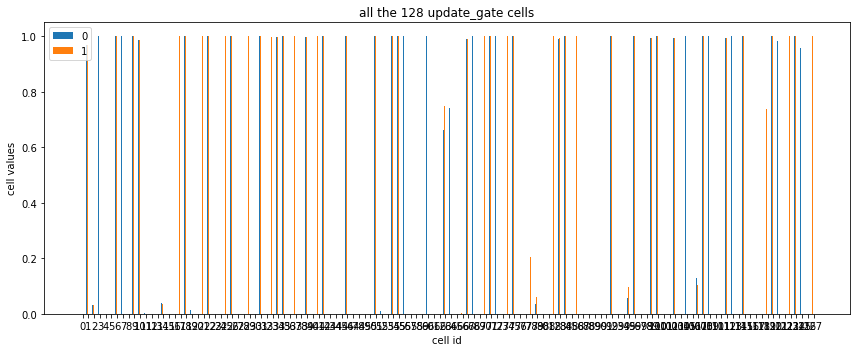

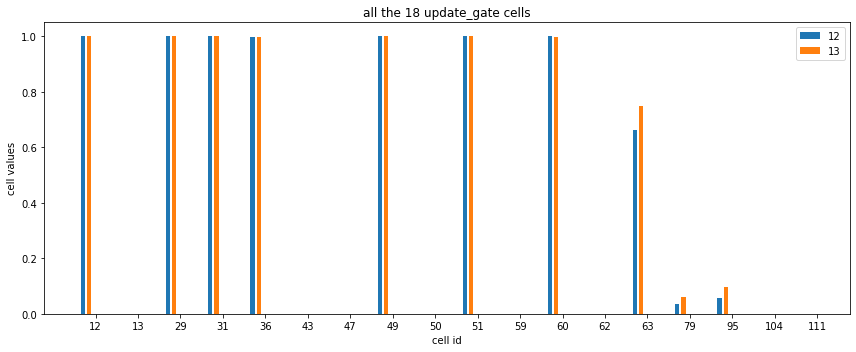

total_sum: 4, plot_cells=[12, 13, 29, 31, 36, 43, 47, 49, 50, 51, 59, 60, 62, 63, 79, 95, 104, 111]
['<SOS>', '干', '脆', '把', '青', '铜', '炊', '器', '啊', '<EOS>', '我', '3', '1']
['<SOS>', '但', '他', '有', '自', '己', '独', '特', '的', '<EOS>', '我', '3', '1']



input:	<SOS>干脆把青铜炊器啊<EOS>我31
pred:	<SOS>我不在我<EOS>

input:	<SOS>但他有自己独特的<EOS>我31
pred:	<SOS>我不是我<EOS>



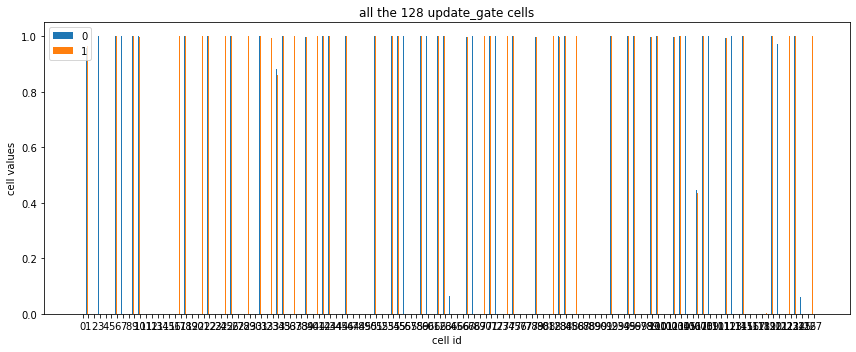

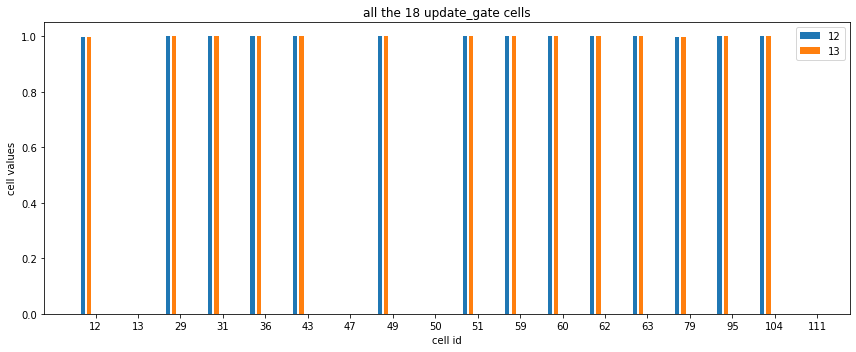

(2, 18) (2, 18) (2, 18) (2, 18)
(6, 18)


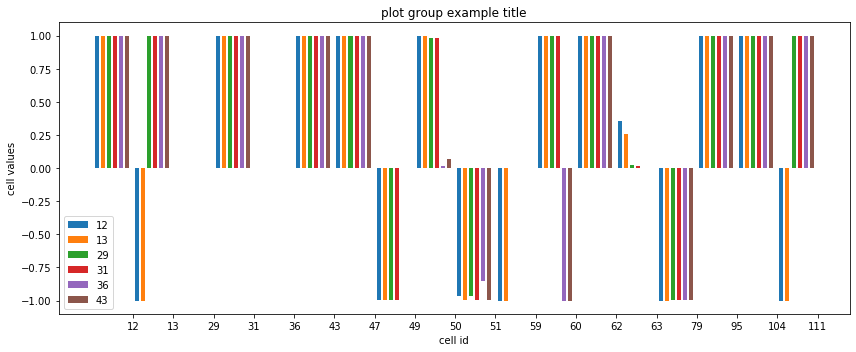

In [656]:
designated_word = random.choice(random.choice(corpus))
designated_word = '我'
print(designated_word)
context, ht_1, up_gate_en, new_gate_en = getContext(plot_cells=swap_cells_final, 
                                         designated_word=designated_word, 
                                         total_sum=6, 
                                         the_first_num=4, 
                                         print_sent=True,
                                         sample_size=2,
                                         verbose=True)
# _, ht_1_, _, _ = getContext(plot_cells=swap_cells_final, 
#                                          designated_word=designated_word, 
#                                          total_sum=8, 
#                                          the_first_num=6, 
#                                          print_sent=True,
#                                          sample_size=2,
#                                          verbose=True)
_, ht_1_, _, _ = getContext(plot_cells=swap_cells_final, 
                                         designated_word=designated_word, 
                                         total_sum=4, 
                                         the_first_num=3, 
                                         print_sent=True,
                                         sample_size=2,
                                         verbose=True)
print(context.shape, ht_1.shape, up_gate_en.shape, new_gate_en.shape)

datagroup = np.concatenate((context, ht_1, ht_1_), axis=0)
print(datagroup.shape)
plotGroup(datagroup, swap_cells_final)

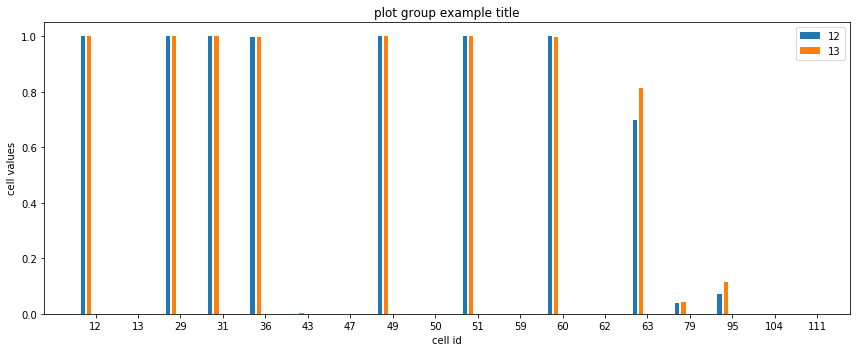

In [654]:
plotGroup(up_gate_en,swap_cells_final)

我
(2, 18) (2, 18) (2, 18) (2, 18)
(6, 18)


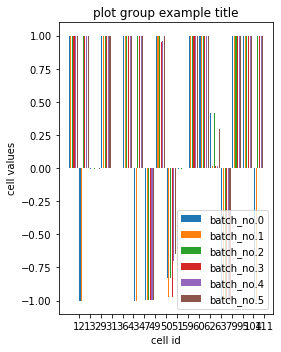

In [719]:
designated_word = random.choice(random.choice(corpus))
designated_word = '我'
plot_gate_type = 'new_gate'
print(designated_word)
# for i in [2, 3, 4]:
#     for j in [1, 2, 3]:
for i in []:
    for j in []:
        getContext(plot_cells=swap_cells_final, 
                         designated_word=designated_word, 
                         total_sum=(i+j), 
                         the_first_num=i, 
                         print_sent=True,
                         sample_size=2,
                         verbose=True,
                         plot_gate_type=plot_gate_type)

print(context.shape, ht_1.shape, up_gate_en.shape, new_gate_en.shape)

datagroup = np.concatenate((context, ht_1, ht_1_), axis=0)
print(datagroup.shape)
plotGroup(datagroup, swap_cells_final)

total_sum: 3, plot_cells=[12, 13, 47, 50, 111]
['<SOS>', '风', '吹', '动', '他', '的', '从', '前', '还', '<EOS>', '我', '2', '1']
['<SOS>', '只', '是', '藏', '在', '心', '里', '看', '在', '<EOS>', '我', '2', '1']
['<SOS>', '第', '三', '是', '勇', '气', '啊', '啊', '啊', '<EOS>', '我', '2', '1']


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



input:	<SOS>风吹动他的从前还<EOS>我21
pred:	<SOS>你是我的<EOS>

input:	<SOS>只是藏在心里看在<EOS>我21
pred:	<SOS>你是我的<EOS>

input:	<SOS>第三是勇气啊啊啊<EOS>我21
pred:	<SOS>你是我的<EOS>



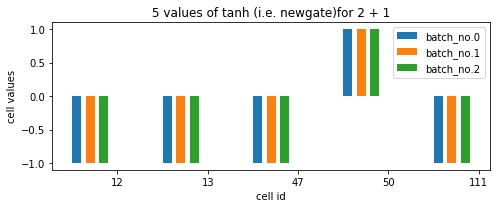

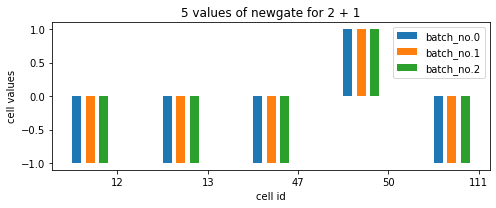

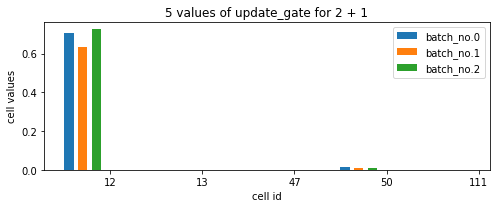

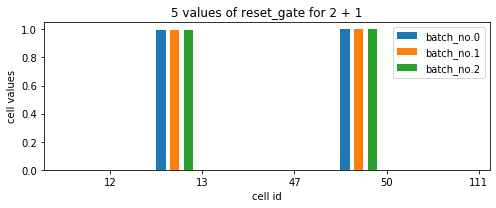

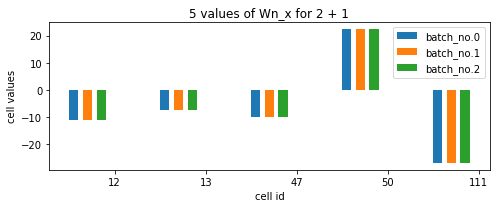

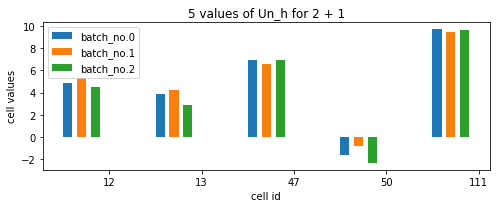

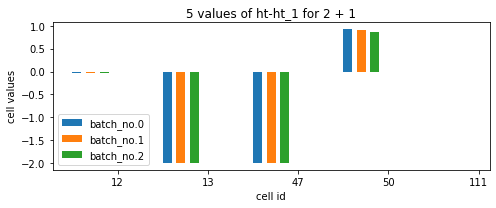

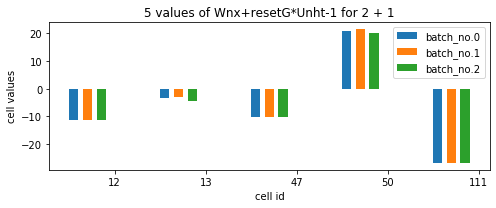

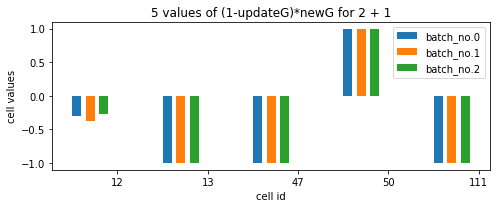

(array([[-0.9456112 , -1.        , -1.        ,  0.9887808 , -1.        ],
        [-0.9414104 , -1.        , -1.        ,  0.99300015, -1.        ],
        [-0.94059163, -1.        , -1.        ,  0.99142087, -1.        ]],
       dtype=float32),
 array([[-0.9227785 ,  1.        ,  0.9999987 ,  0.06279046, -0.9999999 ],
        [-0.9074586 ,  1.        ,  0.9999987 ,  0.07777557, -0.9999999 ],
        [-0.918084  ,  1.        ,  0.9999987 ,  0.12508535, -0.9999999 ]],
       dtype=float32),
 array([[7.0432222e-01, 2.2674496e-10, 2.7505507e-18, 1.1970873e-02,
         1.1802254e-10],
        [6.3311738e-01, 1.5913384e-10, 4.8957797e-18, 7.5901970e-03,
         4.5086546e-11],
        [7.2523540e-01, 2.1551227e-10, 4.8861335e-18, 9.8057045e-03,
         1.0116667e-10]], dtype=float32),
 array([[-1., -1., -1.,  1., -1.],
        [-1., -1., -1.,  1., -1.],
        [-1., -1., -1.,  1., -1.]], dtype=float32))

In [744]:
cells_2_plus_1 = [12, 13, 47, 50, 111]
cells_3_plus_1 = [13, 47, 50, 111]
getContext(plot_cells=cells_2_plus_1, 
         designated_word=designated_word, 
         total_sum=3, 
         the_first_num=2, 
         print_sent=True,
         sample_size=3,
         verbose=True,
         plot_gate_type=plot_gate_type)

total_sum: 4, plot_cells=[13, 47, 50, 111]
['<SOS>', '陶', '喆', '手', '牵', '手', '啊', '啊', '啊', '<EOS>', '我', '3', '1']
['<SOS>', '能', '再', '共', '你', '漫', '步', '田', '园', '<EOS>', '我', '3', '1']
['<SOS>', '总', '是', '望', '向', '窗', '外', '啊', '啊', '<EOS>', '我', '3', '1']


/home/r07944011/anaconda3/envs/sdmlXai/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



input:	<SOS>陶喆手牵手啊啊啊<EOS>我31
pred:	<SOS>你带你我的<EOS>

input:	<SOS>能再共你漫步田园<EOS>我31
pred:	<SOS>你你在我<EOS>

input:	<SOS>总是望向窗外啊啊<EOS>我31
pred:	<SOS>你你在我的<EOS>



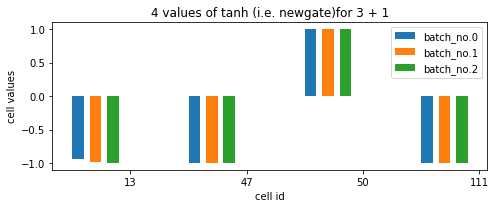

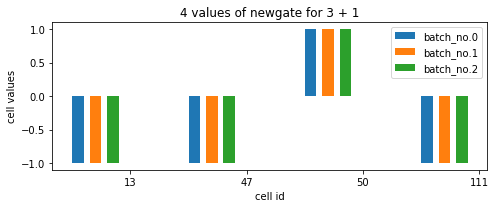

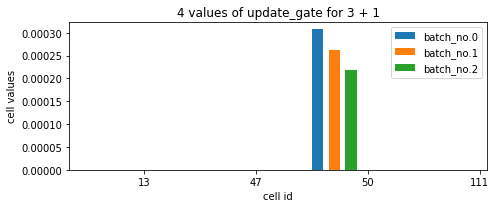

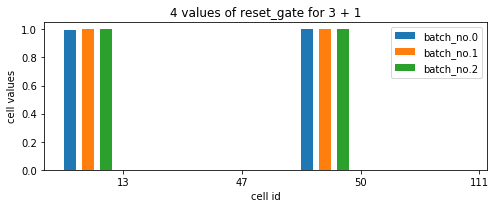

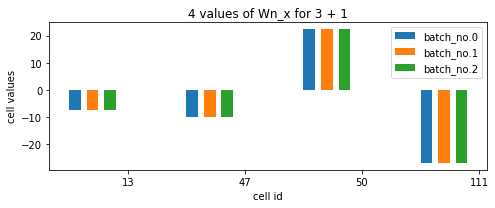

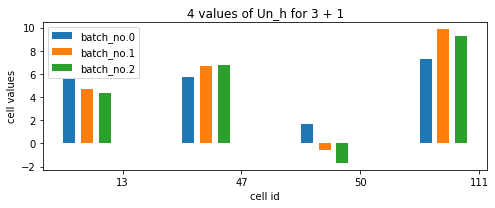

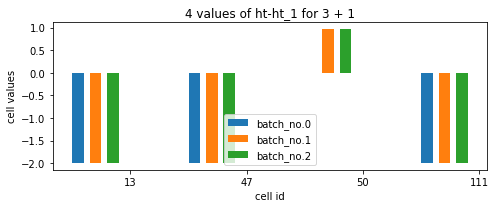

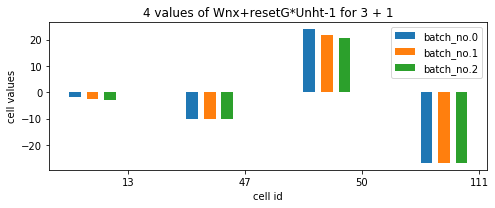

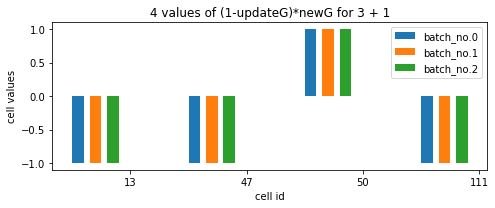

(array([[-1.        , -1.        ,  0.9999992 , -1.        ],
        [-1.        , -1.        ,  0.999747  , -1.        ],
        [-1.        , -1.        ,  0.99978817, -1.        ]],
       dtype=float32), array([[1.        , 0.9999998 , 0.99750364, 0.9999587 ],
        [1.        , 0.9999999 , 0.03352149, 0.99999875],
        [1.        , 0.9999999 , 0.03412486, 0.99999946]], dtype=float32), array([[1.8661638e-10, 6.3549983e-18, 3.0744835e-04, 7.0501702e-09],
        [2.4062594e-10, 1.0649077e-17, 2.6177196e-04, 2.2327644e-10],
        [1.3828347e-10, 6.6593714e-18, 2.1930778e-04, 9.5042724e-11]],
       dtype=float32), array([[-1., -1.,  1., -1.],
        [-1., -1.,  1., -1.],
        [-1., -1.,  1., -1.]], dtype=float32))

In [746]:
getContext(plot_cells=cells_3_plus_1, 
         designated_word=designated_word, 
         total_sum=4, 
         the_first_num=3, 
         print_sent=True,
         sample_size=3,
         verbose=True,
         plot_gate_type=plot_gate_type)